For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

Optional: Push your code and project to github.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv(r'C:\Users\negar\OneDrive\Desktop\CPSC 4800 - W01\Assignment 3\titanic.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.shape

(891, 12)

In [28]:
print('\n Information about the number of missing values in each column: \n\n',df.dtypes,'\n\n')
print(df.info())


 Information about the number of missing values in each column: 

 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp           object
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age Range       object
dtype: object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Ca

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## First, we draw a pair plot to have a general knowledge about the data frame and the relationship between each pair of variables in the dataframe


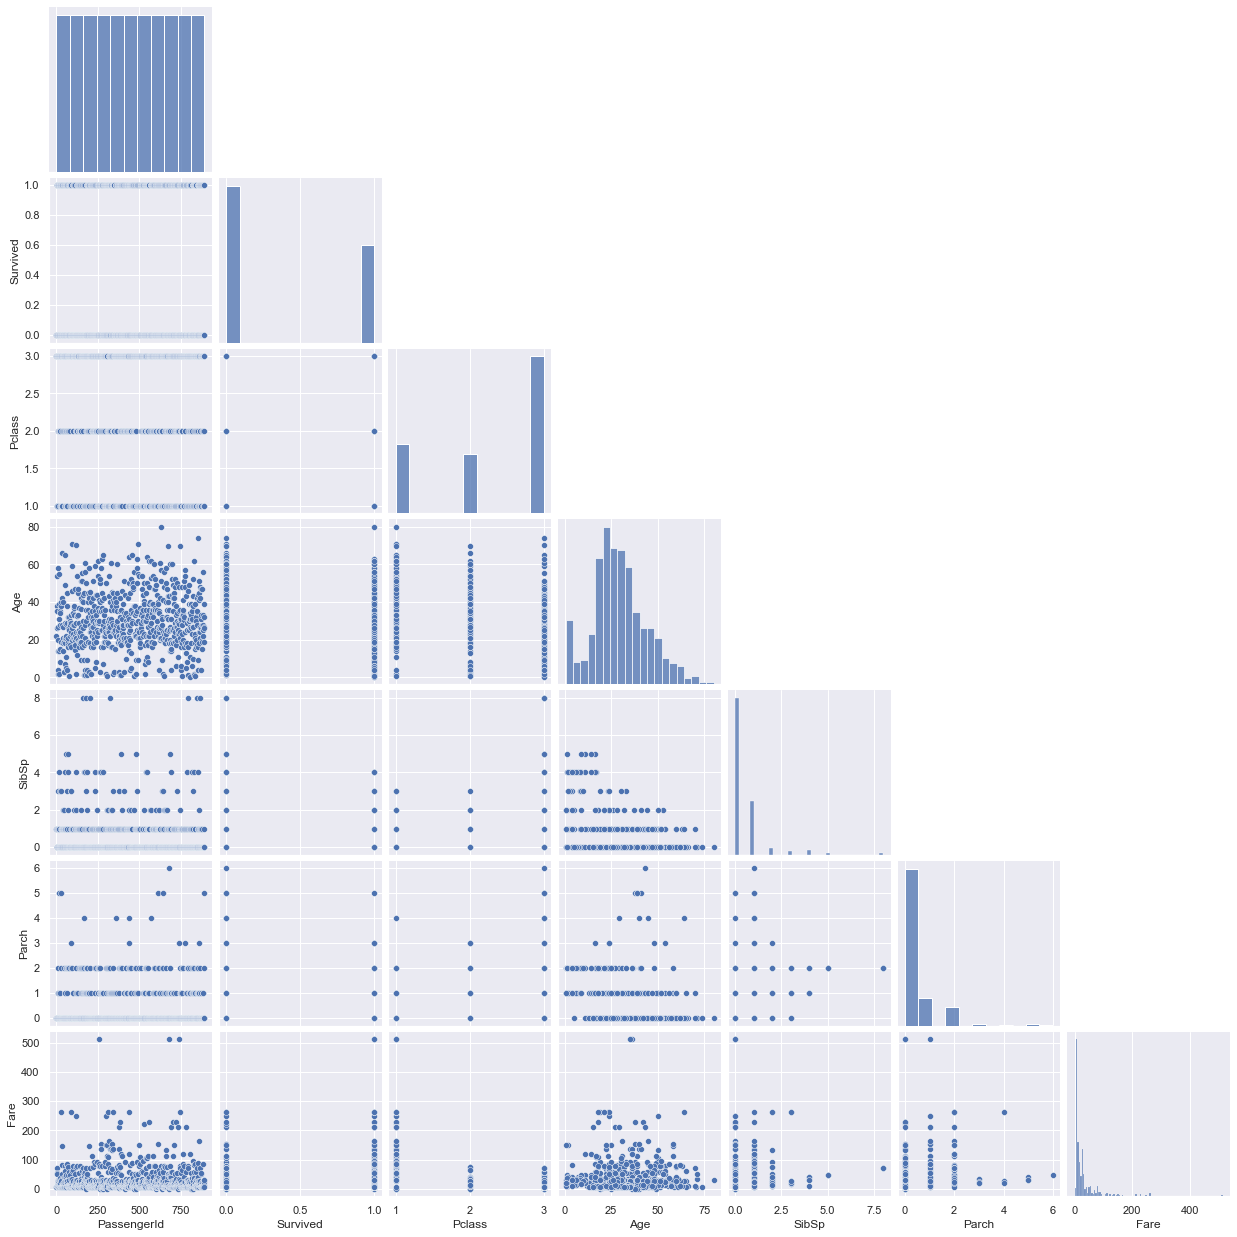

In [8]:
sns.pairplot(df,corner=True)

### Heatmap to find which variables are more correlated to ach other and decide to choose which pairs for assessment

<AxesSubplot:>

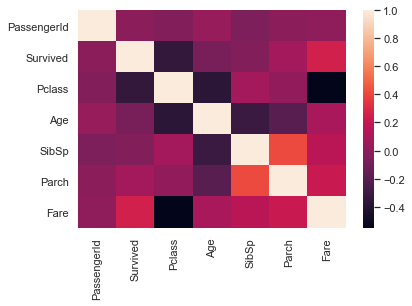

In [9]:
sns.heatmap(df.corr())

# Evaluating Survival rates Based on the Gender

### Contingency Table:

In [10]:
contingency = pd.crosstab(df['Sex'], df['Survived'])
print('Contingency Table for Gender and Survival')
contingency

Contingency Table for Gender and Survival


Survived,0,1
Sex,,
female,81,233
male,468,109


### Chi Square test

In [11]:
chisquare(contingency)

Power_divergenceResult(statistic=array([272.80327869,  44.95906433]), pvalue=array([2.77944664e-61, 2.01196726e-11]))

In [12]:
sex = df.groupby('Sex')

Text(0.5, 0.98, 'Survival Rates Based on Gender')

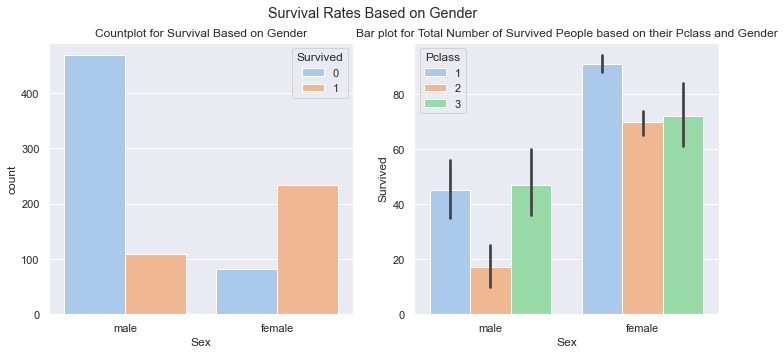

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='Sex',data=df,hue='Survived',palette='pastel')
plt.title('Countplot for Survival Based on Gender')
plt.subplot(1,2,2)
sns.barplot(x='Sex',y='Survived',data=df,hue='Pclass',palette='pastel',estimator=sum)
plt.title('Bar plot for Total Number of Survived People based on their Pclass and Gender')
plt.suptitle('Survival Rates Based on Gender')

# Evaluating Survival Range Based on the Age

In [14]:
age_range = []
for i in range(len(df)):
    if (df.iloc[i]['Age'] >=0) and (df.iloc[i]['Age'] <15):
        age_range.append('Children')
    elif (df.iloc[i]['Age'] >= 15) and (df.iloc[i]['Age'] < 30):
        age_range.append('Early Young')
    elif (df.iloc[i]['Age'] >= 30) and (df.iloc[i]['Age'] < 45):
        age_range.append('Middle Young')
    elif (df.iloc[i]['Age'] >= 45) and (df.iloc[i]['Age'] < 60):
        age_range.append('Late Young')
    elif (df.iloc[i]['Age'] >= 60):
        age_range.append('Elderly')
    else:
        age_range.append(np.nan)
    
df['Age Range'] = age_range

In [15]:
contingency = pd.crosstab(df['Age Range'], df['Survived'])
print('Contingency Table between Age Range and Survival')
contingency

Contingency Table between Age Range and Survival


Survived,0,1
Age Range,,
Children,33,45
Early Young,195,111
Elderly,19,7
Late Young,53,36
Middle Young,124,91


Text(0.5, 0.98, 'Survival Rates Based on Age Range and Pclass')

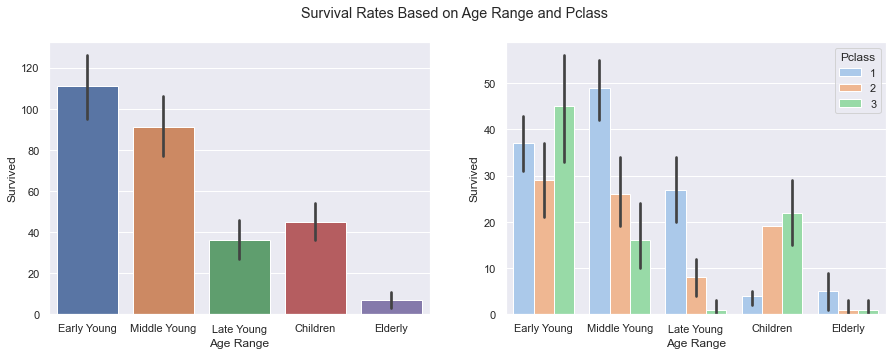

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='Age Range',y='Survived',data=df,estimator=sum)
plt.subplot(1,2,2)
sns.barplot(x='Age Range',y='Survived',data=df,palette='pastel',hue='Pclass',estimator=sum)
plt.suptitle('Survival Rates Based on Age Range and Pclass')

## Checking for the relationship of age and the money the passengers spent to buy a ticket



Text(0.5, 1.0, 'Scatter Plot of the ticket price and passengers ages')

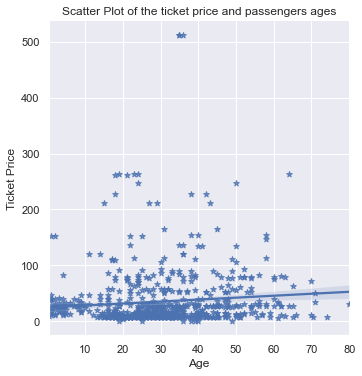

In [59]:
sns.lmplot(x='Age',y='Fare',data=df , fit_reg = True,markers='*')
plt.ylabel('Ticket Price')
plt.title('Scatter Plot of the ticket price and passengers ages')

In [61]:
age_groups = df.groupby('Age Range')
age_groups.describe()

PassengerId                                                       \
                   count        mean         std   min     25%    50%     75%   
Age Range                                                                       
Children            78.0  423.717949  282.756189   8.0  172.25  428.0  690.75   
Early Young        306.0  437.647059  262.000913   1.0  211.50  407.0  676.75   
Elderly             26.0  455.807692  240.078490  34.0  277.25  489.0  629.75   
Late Young          89.0  464.460674  249.212717   7.0  250.00  483.0  661.00   
Middle Young       215.0  465.720930  253.037540   2.0  251.50  473.0  679.50   

                    Survived            ... Parch        Fare             \
                max    count      mean  ...   75%  max  count       mean   
Age Range                               ...                                
Children      870.0     78.0  0.576923  ...   2.0  2.0   78.0  31.704435   
Early Young   890.0    306.0  0.362745  ...   0.0  4.0  306.0  28.571104   
Elderly       852.0     26.0  0.269231  ...   0.0  4.0   26.0  43.467950   
Late Young    880.0     89.0  0.404494  ...   0.0  4.0   89.0  43.749956   
Middle Young  891.0    215.0  0.423256  ...   0.0  6.0  215.0  39.684960   

                                                                         
                    std     min        25%     50%        75%       max  
Age Range                                                                
Children      27.353590  7.2292  18.750000  27.000  32.596875  151.5500  
Early Young   46.789573  0.0000   7.881275  10.500  26.000000  263.0000  
Elderly       51.269998  6.2375  10.500000  28.275  58.860450  263.0000  
Late Young    42.581001  0.0000  13.500000  26.550  61.175000  247.5208  
Middle Young  69.013722  0.0000   8.206250  16.100  34.752100  512.3292  

[5 rows x 48 columns]

Text(0.5, 1.0, 'Scatter Plot of the ticket price and passengers ages')

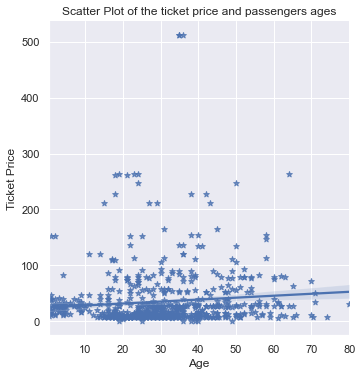

In [79]:
sns.lmplot(x='Age',y='Fare',data=df , fit_reg = True,markers='*')
plt.ylabel('Ticket Price')
plt.title('Scatter Plot of the ticket price and passengers ages')

Text(0, 0.5, '')

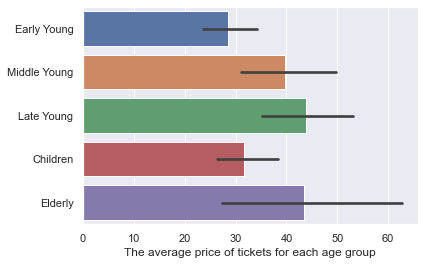

In [84]:
sns.barplot(x='Fare',y='Age Range',data=df,estimator=np.mean)
plt.xlabel('The average price of tickets for each age group')
plt.ylabel('')

### Calulating the correlation between the age of passengers and their ticket price

In [42]:
print('The correlation between the age and ticket price is equal to : ',df['Age'].corr(df['Fare']))

The correlation between the age and ticket price is equal to :  0.09606669176903888
